In [1]:
import sys, os
import argparse

import numpy as np
import pandas as pd
import uproot
import csv, yaml

import h5py
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
infos = []
sis = []

preds = []
labels = []
dVertexs = []
dTs = []
vertexXs = []
vertexYs = []
vertexZs = []
result_output = 'date20220509_eval_0006'
if not os.path.exists('result/' + result_output): os.makedirs('result/' + result_output)
# lists = [1596, 1597, 1598, 1599, 1600, 1606, 1608, 1609, 1614, 1621, 1623, 1624, 1625]
# lists = [1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1644, 1645, 1646, 1647, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678]
# lists = [1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1689]
# lists = [1692, 1693, 1711, 1716, 1717, 1718]
# lists = [1719, 1722, 1724, 1725, 1726, 1727, 1728, 1729, 1732, 1749]
lists = [1750, 1759, 1760, 1761, 1762, 1763, 1766, 1768, 1769, 1770, 1784, 1785, 1787, 1789, 1790, 1795, 1796, 1797, 1798, 1799, 1807, 1809, 1810, 1811, 1812, 1813, 1814]
# lists = [1815, 1817, 1818, 1819, 1821, 1826, 1828]
# lists = [1829, 1830, 1831, 1833, 1835, 1836, 1837, 1838, 1839]
# lists = [1843, 1849, 1850, 1851, 1852, 1853, 1854, 1864]
# lists = [1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916]
# lists = [1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1928, 1930, 1932, 1933, 1934, 1935, 1936]
# lists = [1937, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1948, 1949, 1950, 1952]

for i in lists:
    result_input = 'data20220505_noDIN_eval_'+str(i) +'_model_r01592_R14_Z10_nolog'
    
    
    si_path = 'result/' + result_input + '/sampleInfo_eval.csv'
    fPred = 'result/' + result_input + '/' + result_input + '.csv'
    si = pd.read_csv(si_path)
    info = pd.read_csv(fPred)
    
    info_numpy = np.array(info)
    si_numpy = np.array(si)

    
    for i in range(len(info_numpy)):

        label = info_numpy[i][0]
        pred = info_numpy[i][1]

        fileidx = info_numpy[i][4]

        filename = si_numpy[int(fileidx)][2]


        idx = info_numpy[i][5]


        data = h5py.File(filename,'r')

#         dT = data['events']['dT'][idx]
        dVertex = data['events']['dVertex'][idx]
        vertexX = data['events']['vertexX'][idx]
        vertexY = data['events']['vertexY'][idx]
        vertexZ = data['events']['vertexZ'][idx]


        preds.append(pred)
        labels.append(label)
        dVertexs.append(dVertex)
#         dTs.append(dT)
    #     print(dTs.type)
        vertexXs.append(vertexX)
        vertexYs.append(vertexY)
        vertexZs.append(vertexZ)

In [3]:




preds = np.array(preds)
labels = np.array(labels)
dVertexs = np.array(dVertexs)
# dTs = np.array(dTs)
vertexXs = np.array(vertexXs)
vertexYs = np.array(vertexYs)
vertexZs = np.array(vertexZs)


ME_label = []
ME_dVertex = []
# ME_dT = []
ME_vertexX = []
ME_vertexY = []
ME_vertexZ = []
ME_pred = []


FN_label = []
FN_dVertex = []
# FN_dT = []
FN_vertexX = []
FN_vertexY = []
FN_vertexZ = []
FN_pred = []

for i in range(len(preds)):
    if labels[i] == 1:
        ME_label.append(labels[i])
        ME_dVertex.append(dVertexs[i])
#         ME_dT.append(dTs[i])
        ME_vertexX.append(vertexXs[i])
        ME_vertexY.append(vertexYs[i])
        ME_vertexZ.append(vertexZs[i])
        ME_pred.append(preds[i])
    else:
   
        FN_label.append(labels[i])
        FN_dVertex.append(dVertexs[i])
#         FN_dT.append(dTs[i])
        FN_vertexX.append(vertexXs[i])
        FN_vertexY.append(vertexYs[i])
        FN_vertexZ.append(vertexZs[i])
        FN_pred.append(preds[i])
        
ME_sig = -np.log((1/np.array(ME_pred))-1)
FN_sig = -np.log((1/np.array(FN_pred))-1)
FN_over_0 = 100*np.sum(FN_sig > 0)/len(FN_sig)
ME_under_0 = 100*np.sum(ME_sig < 0)/len(ME_sig)


##################plot CNN score distribution figure
plt.hist(FN_sig, bins = 100, range = (-20, 20), density = True, color ='r',histtype = 'step')
plt.hist(ME_sig, bins = 100, range = (-20, 20), density = True, color ='b',histtype = 'step')
# plt.text(10, 0.15,'FN > 0' + str(FN_over_0), fontsize = 20)
# plt.text(10, 0.1, 'ME < 0' + str(ME_under_0), fontsize = 20)


FN_over = '%.2f' %FN_over_0
ME_under = '%.2f' %ME_under_0

label = ['FN : FN > 0 = '+FN_over+'%', 
         'ME : ME < 0 = '+ME_under+'%']


leg = plt.legend(label, loc = 'best', frameon=False)

leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=15)
plt.setp(leg_texts, fontsize=15)

plt.title('')
plt.savefig('result/' + result_output + '/' + result_output + '_CNN score distribution.png', dpi=300)
plt.clf()



num_FN = len(FN_dVertex)
num_ME = len(ME_dVertex)
###########plot dT
# plt.hist(np.array(FN_dT)*0.001, bins = 100, color= 'r', alpha = 0.5, density = True, histtype = 'step')
# plt.hist(np.array(ME_dT)*0.001, bins = 100, color= 'b', alpha = 0.5, density = True, histtype = 'step')

# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
# plt.xlabel("\u03BCs", fontsize=15, loc='right')
# plt.savefig('result/' + result_output + '/' + result_output + '_dT.png', dpi=300)
# plt.clf()

###########plot dVertex
plt.hist(np.array(FN_dVertex)*100, bins = 80, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.hist(np.array(ME_dVertex)*100, bins = 80, color= 'b', alpha = 0.5, density = True, histtype = 'step')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("cm", fontsize=15, loc='right')
plt.savefig('result/' + result_output + '/' + result_output + '_dVertex.png', dpi=300)
plt.clf()


##############plot vertexZ
plt.hist(np.array(FN_vertexZ)*100, bins = 80, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.hist(np.array(ME_vertexZ)*100, bins = 80, color= 'b', alpha = 0.5, density = True, histtype = 'step')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("cm", fontsize=15, loc='right')
plt.savefig('result/' + result_output + '/' + result_output + '_vertexZ.png', dpi=300)
plt.clf()


##############plot R2
plt.hist((np.array(FN_vertexX)**2+np.array(FN_vertexY)**2)*100, bins = 80, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.hist((np.array(ME_vertexX)**2+np.array(ME_vertexY)**2)*100, bins = 80, color= 'b', alpha = 0.5, density = True, histtype = 'step')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("cm", fontsize=15, loc='right')
plt.savefig('result/' + result_output + '/' + result_output + '_vertex_R2.png', dpi=300)
plt.clf()

####################################################################################

list_range = np.arange(0,1,0.001)


for i in range(len(list_range)):
    a = len(np.array(ME_pred)[np.array(ME_pred)>list_range[i]])/len(np.array(ME_pred))
#     print(list_range[i])
    
    if (a > 0.99):
     
        eff_99 = list_range[i]
        continue
        
    if (a > 0.95):
        
        eff_95 = list_range[i]
        continue
        
    if (a > 0.90):
       
        eff_90 = list_range[i]
        continue
##### eff 0.5 pred
eff_50_ME = len(np.array(ME_pred)[np.array(ME_pred)>0.5])/len(np.array(ME_pred))
eff_50_FN = len(np.array(FN_pred)[np.array(FN_pred)>0.5])/len(np.array(FN_pred))
num_50_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>0.5])/len(np.array(ME_pred))
num_50_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>0.5])/len(np.array(FN_pred))



##### eff 99% efficient
eff_99_ME = len(np.array(ME_pred)[np.array(ME_pred)>eff_99])/len(np.array(ME_pred))
eff_99_FN = len(np.array(FN_pred)[np.array(FN_pred)>eff_99])/len(np.array(FN_pred))
num_99_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>eff_99])/len(np.array(ME_pred))
num_99_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>eff_99])/len(np.array(FN_pred))




##### eff 95% efficient
eff_95_ME = len(np.array(ME_pred)[np.array(ME_pred)>eff_95])/len(np.array(ME_pred))
eff_95_FN = len(np.array(FN_pred)[np.array(FN_pred)>eff_95])/len(np.array(FN_pred))
num_95_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>eff_95])/len(np.array(ME_pred))
num_95_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>eff_95])/len(np.array(FN_pred))


##### eff 90% efficient
eff_90_ME = len(np.array(ME_pred)[np.array(ME_pred)>eff_90])/len(np.array(ME_pred))
eff_90_FN = len(np.array(FN_pred)[np.array(FN_pred)>eff_90])/len(np.array(FN_pred))
num_90_ME = num_ME*len(np.array(ME_pred)[np.array(ME_pred)>eff_90])/len(np.array(ME_pred))
num_90_FN = num_FN*len(np.array(FN_pred)[np.array(FN_pred)>eff_90])/len(np.array(FN_pred))


f = open('result/' + result_output + '/' + result_output + '_efficiency.txt','w')
print('         |   90%   |   95%   |   99%   |   mid   |',file=f)
print('--------------------------------------------------',file=f)
print('  ME_eff |','%.4f  |'%eff_90_ME,'%.4f  |'%eff_95_ME,'%.4f  |'%eff_99_ME,'%.4f  |'%eff_50_ME,file=f)
print('--------------------------------------------------',file=f)
print('  FN_eff |','%.4f  |'%eff_90_FN,'%.4f  |'%eff_95_FN,'%.4f  |'%eff_99_FN,'%.4f  |'%eff_50_FN,file=f)
print('--------------------------------------------------',file=f)
print('ME_remain|','%7d'%int(num_90_ME),'|','%7d'%int(num_95_ME),'|','%7d'%int(num_99_ME),'|','%7d'%int(num_50_ME),'|',file=f)
print('--------------------------------------------------',file=f)
print('FN_remain|','%7d'%int(num_90_FN),'|','%7d'%int(num_95_FN),'|','%7d'%int(num_99_FN),'|','%7d'%int(num_50_FN),'|',file=f)
print('--------------------------------------------------',file=f)
print('CNN score|','','%.3f'%eff_90,' | ','%.3f'%eff_95,' | ','%.3f'%eff_99,' |  ',0.5,'  |',file=f)
print('==================================================',file=f)
print('         |   FN    |   ME    |',file=f)
print('# data   |','%7d'%len(FN_dVertex),'|', '%7d'%len(ME_dVertex),'|',file=f)

f.close()



###############plot evaluation 

##### Draw ROC curve #####
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.cbook import get_sample_data

df = pd.read_csv(fPred)
tpr, fpr, thr = roc_curve(df['label'], df['prediction'], sample_weight=df['weight'], pos_label=0)
auc = roc_auc_score(df['label'], df['prediction'], sample_weight=df['weight'])


df_bkg = df[df.label==0]
df_sig = df[df.label==1]
plt.rcParams['figure.figsize'] = (10, 10)

plt.hist(df_bkg['prediction']*100, weights=df_bkg['weight'], histtype='step', 
         density=True, bins=50, color='red', linewidth=3)

plt.hist(df_sig['prediction']*100, weights=df_sig['weight'], histtype='step', 
         density=True, bins=50, color='blue', linewidth=3)



plt.xticks(np.arange(0, 101, step=20),["{}".format(x*0.01) for x in np.arange(0, 101,step=20)],fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("CNN score", fontsize=15, loc='right')
plt.ylabel("Normalized", fontsize=15, loc='top')
plt.xlim(0, 100)
label = ['Fast Neutron', 'Michel Electrons']

leg = plt.legend(label, loc = 'upper center', frameon=False)

leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=10)
plt.setp(leg_texts, fontsize=10)

plt.savefig('result/' + result_output + '/' + result_output + '_evaluation.png', dpi=300)
plt.clf()



###################### plot AUC


plt.rcParams['figure.figsize'] = (15, 15)



plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)



plt.plot(fpr*100, tpr*100, label='AUC = %.3f' % (auc))
plt.plot(eff_99_FN*100, eff_99_ME*100,'*r', markersize=40)

plt.plot(eff_95_FN*100, eff_95_ME*100,'*g', markersize=40)

plt.plot(eff_90_FN*100, eff_90_ME*100,'*b', markersize=40)

plt.plot(eff_50_FN*100, eff_50_ME*100,'*k', markersize=40)

plt.xlabel('FN efficiency (%)', fontsize=15, loc='right')
plt.ylabel('ME efficiency (%)', fontsize=15, loc='top')


plt.xlim(0, 100)
plt.ylim(0, 100)

plt.grid()
print_auc = '%.3f' %auc
print_eff_99 = '%.3f' %eff_99
print_eff_95 = '%.3f' %eff_95
print_eff_90 = '%.3f' %eff_90
label = ['AUC = '+print_auc,'99% WP(score='+print_eff_99+')', '95% WP(score='+print_eff_95+')', '90% WP(score='+print_eff_90+')','Middle WP (score=0.5)']

leg = plt.legend(label, loc = 'right', frameon=False)

 
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=10)
plt.setp(leg_texts, fontsize=10)

plt.savefig('result/' + result_output + '/' + result_output + '_AUC.png', dpi=300)
plt.clf()


f = open('result/' + result_output + '/' + result_output + '_information.txt','w')


print(eff_90_ME,eff_95_ME,eff_99_ME,eff_50_ME,file=f)

print(eff_90_FN,eff_95_FN,eff_99_FN,eff_50_FN,file=f)

print(int(num_90_ME),int(num_95_ME),int(num_99_ME),int(num_50_ME),file=f)

print(int(num_90_FN),int(num_95_FN),int(num_99_FN),int(num_50_FN),file=f)

print(eff_90,eff_95,eff_99,0.5,file=f)


print(len(FN_dVertex),len(ME_dVertex),file=f)
print(auc,file=f)

f.close()



/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.s

<Figure size 432x288 with 0 Axes>

In [4]:
print('end')

end


In [5]:
list_range = 0.5
a = len(np.array(ME_pred)[np.array(ME_pred)>list_range])/len(np.array(ME_pred))
b = len(np.array(FN_pred)[np.array(FN_pred)<list_range])/len(np.array(FN_pred))
print(b,'FN')
print(a,'ME')

0.9561298076923077 FN
0.9229582528439579 ME


In [7]:
list_range = 0.45
a = len(np.array(ME_pred)[np.array(ME_pred)>list_range])/len(np.array(ME_pred))
b = len(np.array(FN_pred)[np.array(FN_pred)<list_range])/len(np.array(FN_pred))
print(b,'FN')
print(a,'ME')

0.950360576923077 FN
0.931973062889032 ME


In [41]:
for i in range(len(tpr)):
    print(tpr[i],fpr[i],thr[i])

0.0 0.0 2.0
0.019222599830076466 0.0 1.0
0.021983857264231094 0.0 0.9999998807907104
0.023470688190314358 0.0 0.9999997615814208
0.024107901444350044 0.0 0.9999996423721312
0.02495751911639762 0.0 0.9999995231628418
0.02570093457943925 0.0 0.9999994039535522
0.026762956669498725 0.0 0.9999991655349731
0.027081563296516568 0.0 0.9999990463256836
0.02750637213254036 0.0 0.999998927116394
0.02814358538657604 0.0 0.9999986886978148
0.02856839422259983 0.0 0.9999985694885254
0.02888700084961767 0.0 0.9999984502792358
0.02931180968564146 0.0 0.9999983310699464
0.029842820730671196 0.0 0.9999982118606568
0.030692438402718777 0.0 0.9999979734420776
0.030904842820730673 0.0 0.9999977350234984
0.031011045029736617 0.0 0.999997615814209
0.031223449447748512 0.0 0.99999737739563
0.03143585386576041 0.0 0.9999969005584716
0.03175446049277825 0.0 0.999996781349182
0.03217926932880204 0.0 0.9999964237213136
0.03239167374681393 0.0 0.9999961853027344
0.03260407816482583 0.0 0.9999960660934448
0.032922

In [19]:
tpr, fpr, thr = roc_curve(df['label'], df['prediction'], sample_weight=df['weight'], pos_label=0)
auc = roc_auc_score(df['label'], df['prediction'], sample_weight=df['weight'])


In [38]:
thr

array([2.00000000e+00, 1.00000000e+00, 9.99999881e-01, 9.99999762e-01,
       9.99999642e-01, 9.99999523e-01, 9.99999404e-01, 9.99999166e-01,
       9.99999046e-01, 9.99998927e-01, 9.99998689e-01, 9.99998569e-01,
       9.99998450e-01, 9.99998331e-01, 9.99998212e-01, 9.99997973e-01,
       9.99997735e-01, 9.99997616e-01, 9.99997377e-01, 9.99996901e-01,
       9.99996781e-01, 9.99996424e-01, 9.99996185e-01, 9.99996066e-01,
       9.99995828e-01, 9.99994874e-01, 9.99994755e-01, 9.99994636e-01,
       9.99994278e-01, 9.99994040e-01, 9.99993682e-01, 9.99987245e-01,
       9.99986649e-01, 9.99984503e-01, 9.99984026e-01, 9.99982357e-01,
       9.99981284e-01, 9.99979496e-01, 9.99979377e-01, 9.99972701e-01,
       9.99972582e-01, 9.99968886e-01, 9.99967456e-01, 9.99960065e-01,
       9.99959469e-01, 9.99948502e-01, 9.99948263e-01, 9.99945760e-01,
       9.99945402e-01, 9.99936581e-01, 9.99935985e-01, 9.99896884e-01,
       9.99896288e-01, 9.99858260e-01, 9.99858141e-01, 9.99852657e-01,
      

In [17]:
optimal_idx = np.argmax(tpr—fpr) 




SyntaxError: invalid character in identifier (<ipython-input-17-2912b072f1b0>, line 1)

In [27]:
optimal_threshold = thr[199]
print(optimal_threshold)

0.2714951932430267


Text(0, 1, 'ME efficiency (%)')

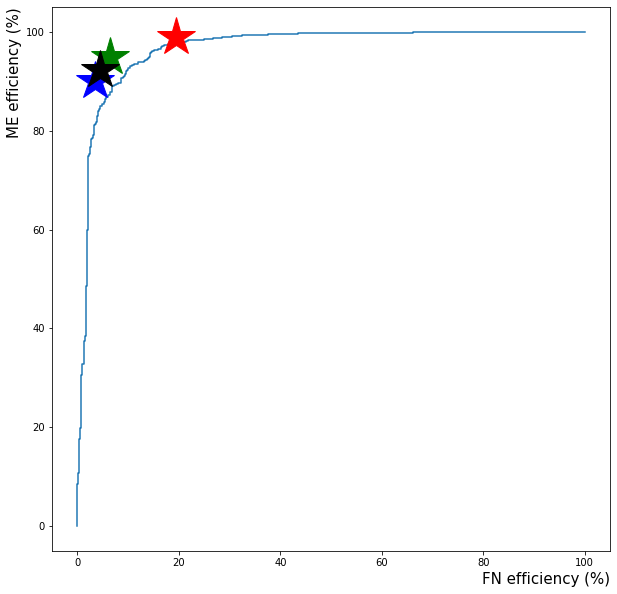

In [39]:


plt.plot(fpr*100, tpr*100, label='AUC = %.3f' % (auc))
plt.plot(eff_99_FN*100, eff_99_ME*100,'*r', markersize=40)

plt.plot(eff_95_FN*100, eff_95_ME*100,'*g', markersize=40)

plt.plot(eff_90_FN*100, eff_90_ME*100,'*b', markersize=40)

plt.plot(eff_50_FN*100, eff_50_ME*100,'*k', markersize=40)

plt.xlabel('FN efficiency (%)', fontsize=15, loc='right')
plt.ylabel('ME efficiency (%)', fontsize=15, loc='top')


(array([0.00153995, 0.00201786, 0.00223027, 0.00249578, 0.00201786,
        0.00217717, 0.00249578, 0.0030799 , 0.00276129, 0.00249578,
        0.0032923 , 0.00254888, 0.00345161, 0.00270819, 0.003133  ,
        0.00265508, 0.00292059, 0.00217717, 0.00249578, 0.00297369,
        0.00233647, 0.00361091, 0.0030268 , 0.0031861 , 0.00244268,
        0.00286749, 0.00334541, 0.00297369, 0.00334541, 0.0032392 ,
        0.003133  , 0.0032392 , 0.00334541, 0.00446054, 0.00387642,
        0.00398263, 0.00424813, 0.00499156, 0.00531017, 0.00562878,
        0.00706252, 0.00961141, 0.01338162, 0.02676325, 0.03642776,
        0.03759599, 0.03924215, 0.05140243, 0.05580987, 0.09845053]),
 array([1.09477551e-03, 2.00107288e+00, 4.00105098e+00, 6.00102909e+00,
        8.00100719e+00, 1.00009853e+01, 1.20009634e+01, 1.40009415e+01,
        1.60009196e+01, 1.80008977e+01, 2.00008758e+01, 2.20008539e+01,
        2.40008320e+01, 2.60008101e+01, 2.80007882e+01, 3.00007663e+01,
        3.20007444e+01, 3.4000

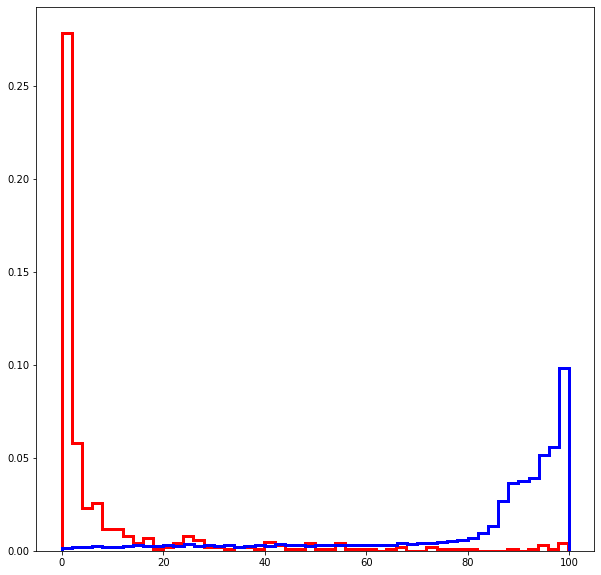

In [40]:
tpr, fpr, thr = roc_curve(df['label'], df['prediction'], sample_weight=df['weight'], pos_label=0)
auc = roc_auc_score(df['label'], df['prediction'], sample_weight=df['weight'])


df_bkg = df[df.label==0]
df_sig = df[df.label==1]
plt.rcParams['figure.figsize'] = (10, 10)

plt.hist(df_bkg['prediction']*100, weights=df_bkg['weight'], histtype='step', 
         density=True, bins=50, color='red', linewidth=3)

plt.hist(df_sig['prediction']*100, weights=df_sig['weight'], histtype='step', 
         density=True, bins=50, color='blue', linewidth=3)

